# Assignment 04: Constructing Confidence Interval

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import matplotlib.pyplot as plt
seed=1110
np.random.seed(seed)

## Question 1 - <span style="color:green">[100]</span>
You are going to work on a dataset which lists some features of the soccer players participated in the 2022 FIFA World Cup. We want to predict the players value and quantify the uncertainty of our prediction using what we learnt in week 4. The dataset has the following attributes:
- `Age`: Player age in years
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

Therefore the target is `Value`.

### Q 1.1 - <span style="color:red">[1]</span> - Load `data.csv` and show the first 5 rows.

In [2]:
#

# Load the data
df = pd.read_csv('data.csv')

# show the first five rows of the data
print(df.head(5))


   Age  Overall  Potential        Value      Wage Preferred Foot  \
0   27       87         88   91000000.0  115000.0          Right   
1   27       86         87   78500000.0  190000.0          Right   
2   30       85         85   46500000.0   46000.0           Left   
3   31       91         91  107500000.0  350000.0          Right   
4   25       86         89   89500000.0  110000.0          Right   

   International Reputation  Weak Foot  Skill Moves Body Type Position  \
0                       4.0        4.0          3.0    Stocky  Reserve   
1                       3.0        3.0          4.0    Stocky   Middle   
2                       2.0        3.0          3.0    Stocky     Back   
3                       4.0        5.0          4.0    Stocky   Middle   
4                       3.0        3.0          3.0    Normal   Middle   

   Height  Weight  
0     189      82  
1     179      69  
2     172      69  
3     181      70  
4     172      68  


### Q 1.2 - <span style="color:red">[3]</span> - Use a pandas relevant method to reveal `Dtype` of the features and indicate whether the date set has any `Null` values. 

In [3]:
print(df.dtypes) # find out about data types for each column

print(df.isnull().sum()) # find out about sums of  missing values in each column



Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Body Type                    object
Position                     object
Height                        int64
Weight                        int64
dtype: object
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Body Type                   0
Position                    0
Height                      0
Weight                      0
dtype: int64


#### *Written Answer: There is no null values in the data set


### Q 1.3 - <span style="color:red">[3]</span> - Use a pandas relevant method to get a summary statistics of the data and inspect it. Which features have the lowest and highest standard deviation respectively? What was the age of the youngest player in the World Cup? 

In [4]:
# Summary stats of the data

print(df.describe())

# grab standard dev for each column (feature)
std= df.describe().loc['std']


# Find the feature with the lowest standard deviation
lowest_std_feature = std[std == std.min()].index[0]
print(f"The feature with the lowest standard deviation is: {lowest_std_feature}")

# Find the feature with the highest standard deviation
highest_std_feature = std[std == std.max()].index[0]
print(f"The feature with the highest standard deviation is: {highest_std_feature}")


# Find the player with the youngest age
youngest_age = df['Age'].min()
print(f"The youngest player's age was: {youngest_age}")




                Age       Overall     Potential         Value           Wage  \
count  17591.000000  17591.000000  17591.000000  1.759100e+04   17591.000000   
mean      23.109317     63.354954     70.973907  2.759077e+06    8244.784265   
std        4.623732      8.029464      6.523326  7.852143e+06   20502.356045   
min       15.000000     44.000000     47.000000  1.000000e+03     500.000000   
25%       20.000000     58.000000     67.000000  3.250000e+05     600.000000   
50%       22.000000     63.000000     71.000000  7.000000e+05    2000.000000   
75%       26.000000     69.000000     75.000000  1.800000e+06    6000.000000   
max       54.000000     91.000000     95.000000  1.905000e+08  450000.000000   

       International Reputation     Weak Foot   Skill Moves        Height  \
count              17591.000000  17591.000000  17591.000000  17591.000000   
mean                   1.103405      2.899324      2.300097    180.893639   
std                    0.400888      0.663286   

#### *Written Answer:*

The youngest player age was 15.

The feature with lowest STD is International Reputation

The feature with Highest STD is Value


### Q 1.4 - <span style="color:red">[4]</span> - Use a pandas relevant method to see the distribution of the numerical features all in one plot window. Which ones look like Gaussian?

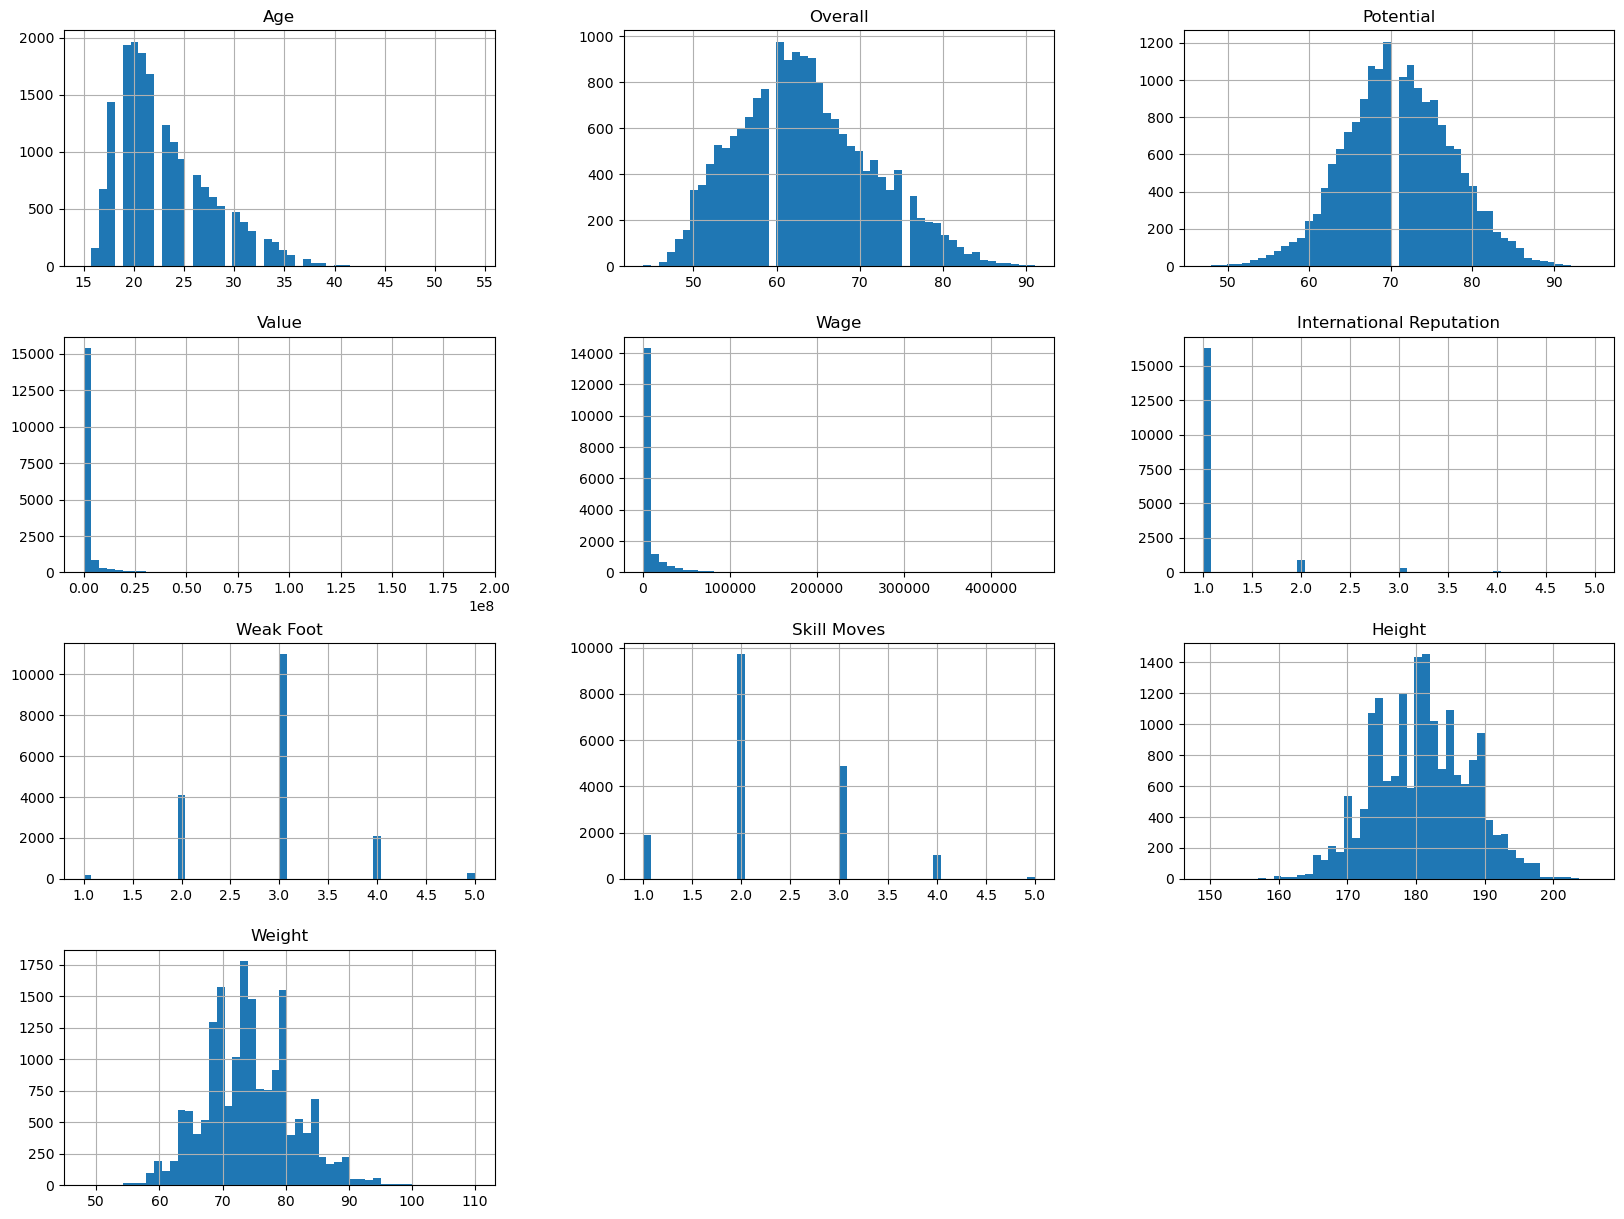

In [5]:
# Using Hist, we plot every feature in the data set to see the distribution of each feature



df.hist(bins=50, figsize=(20,15))
plt.show()


#### *Written Answer:*


Potential, Height and Weight are very clear Gaussian distributions, overall seems to lean a little left but could also be consider gaussian as well. 

### Q 1.5 - <span style="color:red">[2]</span> - Perform one hot encoding to prepare the categorical values for linear regression.

In [6]:
# Perform one hot encoding for categorical features using pandas get_dummies

df_encoded = pd.get_dummies(df, columns=['Preferred Foot', 'Body Type', 'Position'])


### Q 1.6 - <span style="color:red">[4]</span> - Use `seaborn.jointplot` to investigate the relationship between `Overall` and `Value` as well as `Wage` and `Value`.

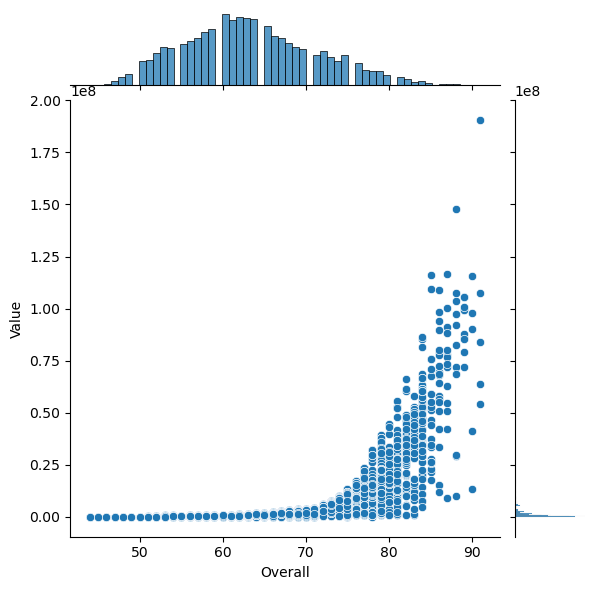

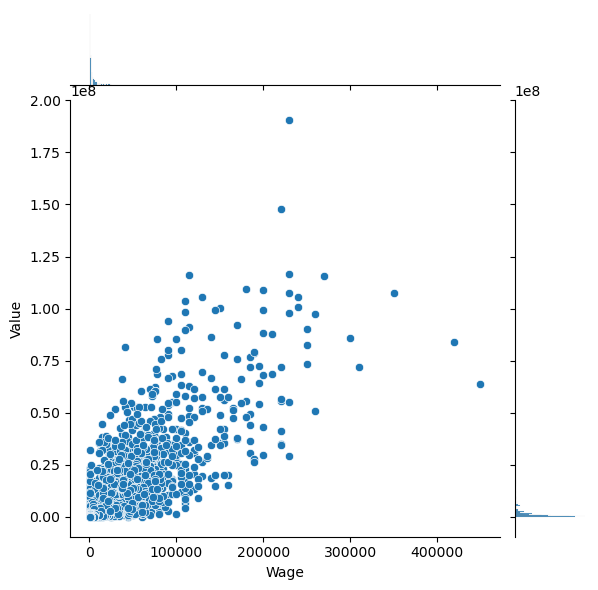

In [7]:

sns.jointplot(x='Overall', y='Value', data=df)
sns.jointplot(x='Wage', y='Value', data=df)


### Q 1.7 - <span style="color:red">[8]</span> - Where applicable, use logarithm function to transform either `Overall`, `Wage`, or `Value` to make them better fit the assumptions of linear regression. `Joinplot` the transformed versions.

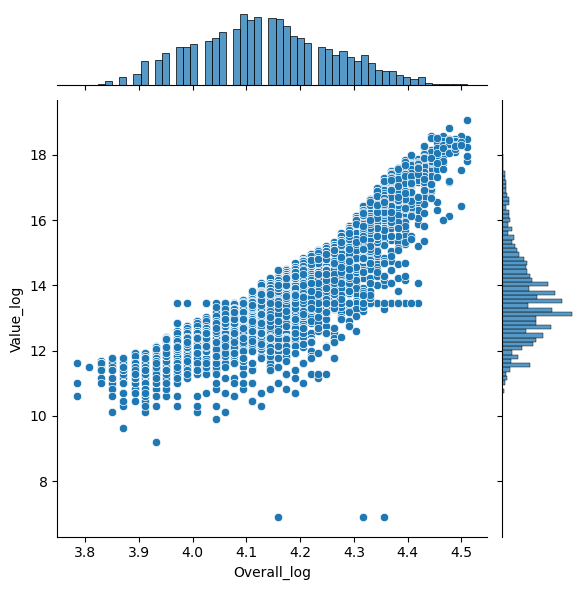

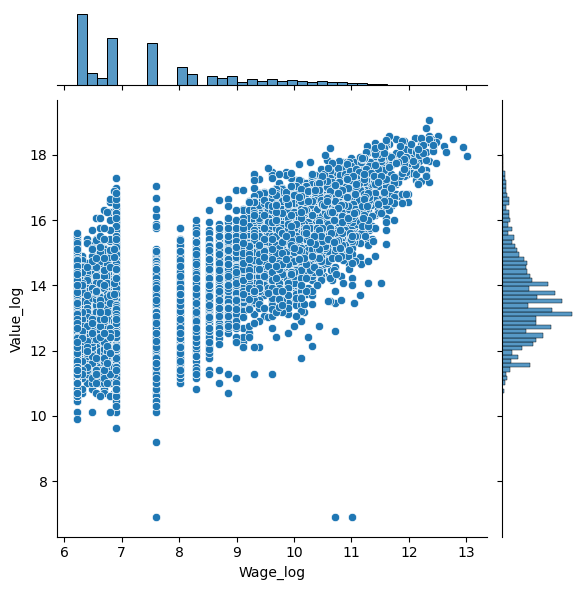

In [8]:

# Apply logarithmic transformation to Overall, Wage, and Value columns
df['Overall_log'] = np.log(df['Overall']) 
df['Wage_log'] = np.log(df['Wage']) 
df['Value_log'] = np.log(df['Value']) 

# Plot the jointplot of the logarithmically transformed Overall and Value columns
sns.jointplot(x='Overall_log', y='Value_log', data=df) 

# Plot the jointplot of the logarithmically transformed Wage and Value columns
sns.jointplot(x='Wage_log', y='Value_log', data=df) 

### Q 1.8 - <span style="color:red">[4]</span> - Add the transformed version of the variables which you chose to transform as new columns to your dataframe.

In [9]:

# Log transform the Value feature
df['Value_log'] = np.log(df['Value'])

# Log transform the Wage feature
df['Wage_log'] = np.log(df['Wage'])

# Log transform the Overall feature
df['Overall_log'] = np.log(df['Overall'])


print (df.head(5))

   Age  Overall  Potential        Value      Wage Preferred Foot  \
0   27       87         88   91000000.0  115000.0          Right   
1   27       86         87   78500000.0  190000.0          Right   
2   30       85         85   46500000.0   46000.0           Left   
3   31       91         91  107500000.0  350000.0          Right   
4   25       86         89   89500000.0  110000.0          Right   

   International Reputation  Weak Foot  Skill Moves Body Type Position  \
0                       4.0        4.0          3.0    Stocky  Reserve   
1                       3.0        3.0          4.0    Stocky   Middle   
2                       2.0        3.0          3.0    Stocky     Back   
3                       4.0        5.0          4.0    Stocky   Middle   
4                       3.0        3.0          3.0    Normal   Middle   

   Height  Weight  Overall_log   Wage_log  Value_log  
0     189      82     4.465908  11.652687  18.326370  
1     179      69     4.454347  12.1

### Q 1.9 - <span style="color:red">[4]</span> - Use `pandas.corr()` to output the pairwise correlation between every feature and the target.

In [10]:

# Calculate the pairwise correlation between every feature and the target
correlation = df.corr()

# Show the correlation between each feature and the target
print(correlation['Value_log'])




Age                         0.301584
Overall                     0.922363
Potential                   0.826055
Value                       0.651667
Wage                        0.630886
International Reputation    0.421334
Weak Foot                   0.269339
Skill Moves                 0.471930
Height                      0.026671
Weight                      0.082446
Overall_log                 0.913904
Wage_log                    0.772331
Value_log                   1.000000
Name: Value_log, dtype: float64


### Q 1.10 - <span style="color:red">[4]</span> - What are the most positively and negatively correlated features? How do you interpret the positive and negative correlations?

#### *Written Answer:

The most postive correlated feature is Wage. The most negative correlated feature is Age when both are considered to the target: Value. I interpretted it by look for the highest value closest to 1 for the postive correlated and inversly for the negatively correlated value.




### Q 1.11 - <span style="color:red">[15]</span> - Let's train a model to predict player `Value` using all features except some (Hint: think about those which you transformed)
1. This time instead of R-squared, use the `mean_squared_error` to calculate Root Mean Squared Error (RMSE) as your model scorer
2. Split the data into train and test with `test_size=0.2, random_state=seed`
3. Pick `LinearRegression()` from sklearn as your model
4. Report both prediction (*i.e.*, on training set) and generalization (*i.e.*, on test set) RMSE scores of your model

In [11]:
df_encoded = pd.get_dummies(df, columns=['Preferred Foot', 'Body Type', 'Position'])
df_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=seed)



# Split the data into features and target
features = df_encoded.drop(['Value'], axis=1)
target = df_encoded['Value']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculate the RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")




Train RMSE: 3784296.28
Test RMSE: 3735352.96


### Q 1.12 - <span style="color:red">[8]</span> - Scatter plot `Overall` vs true `Value` as well as `Overall` vs predicted `Value` in the same graph window over the test set. 

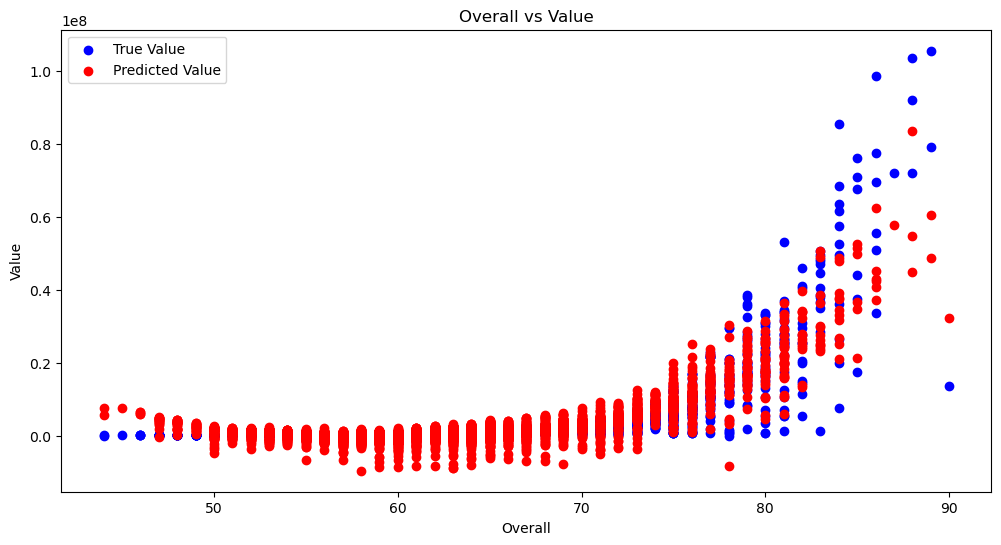

In [12]:
# Plot the scatter plot
plt.figure(figsize=(12,6))
plt.scatter(X_test['Overall'], y_test, color='blue', label='True Value')
plt.scatter(X_test['Overall'], y_test_pred, color='red', label='Predicted Value')
plt.legend()
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Overall vs Value')
plt.show()



### Q 1.13 - <span style="color:red">[15]</span> - Calculate confidence interval (based on 99% confidence level) for mean `Value` by bootstrapping. For this purpose, code a bootstrap function that in each bootstrap iteration, samples from the training set to fit the linear regression model and uses the test set to make predictions - therefore your bootstrap statistic is the average of the predictions over the test set. Your function must take as input arguments: your model, Xtrain, ytrain, Xtest, and numboot=100. The function must return only one object that is the array of recorded values for the bootstrap statistic.

In [13]:
import numpy as np

def bootstrap_linear_regression(model, X_train, y_train, X_test, num_boot=100):
    bootstrapped_values = []
    for i in range(num_boot):
        X_train_sample = X_train.sample(frac=1, replace=True)
        y_train_sample = y_train.loc[X_train_sample.index]
        model.fit(X_train_sample, y_train_sample)
        y_pred = model.predict(X_test)
        bootstrapped_values.append(y_pred.mean())
    return np.array(bootstrapped_values)




### Q 1.14 - <span style="color:red">[6]</span> - Construct a 99% confidence interval using the Central Limit Theorem. 

In [14]:
#

mean = np.mean(bootstrap_linear_regression(reg, X_train, y_train, X_test))
std = np.std(bootstrap_linear_regression(reg, X_train, y_train, X_test))
confidence_interval = (mean - 2 * std, mean + 2 * std)
print(confidence_interval)

(2660708.699121011, 2779524.718563941)


### Q 1.15 - <span style="color:red">[10]</span> - We want to see the effect of sample size ($n$) on the CI calculated from CLT. Write a `for` loop which in each iteration randomly samples from your "sample statistic" and calculates and stores the width (*i.e.*, $\mid$ Upper Bound - Lower Bound $\mid$) of the corresponding CI in an array. Obviously, you should start from a small $n$ and increase it per iteration (step size up to you). After the loop, plot sample size (*i.e.*, $n$) against the CI widths and explain your observation in one sentence.

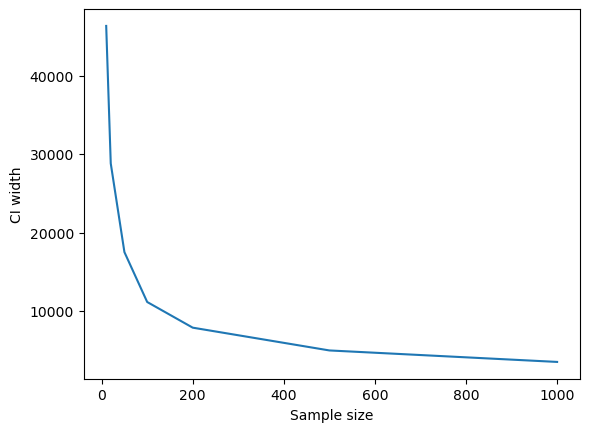

In [15]:

sample_sizes = [10, 20, 50, 100, 200, 500, 1000]
widths = []
bootstrapped_values = bootstrap_linear_regression(reg, X_train, y_train, X_test, num_boot=100)

for n in sample_sizes:

    sample_statistic = bootstrapped_values[:n]
    mean = np.mean(sample_statistic)
    std = np.std(sample_statistic)
    lower_bound = mean - 2 * std / np.sqrt(n)
    upper_bound = mean + 2 * std / np.sqrt(n)
    width = upper_bound - lower_bound
    widths.append(width)

plt.plot(sample_sizes, widths)
plt.xlabel('Sample size')
plt.ylabel('CI width')
plt.show()



#### *Written Answer:*

The CI width seems to drop exponentially when the sample sizes increases


### Q 1.16 - <span style="color:red">[6]</span> - Randomly subsample your "sample statistic" with $n=30$ and calculate $t$-based 99% CI. Is it a good idea to calculate CI for this data set this way? Why?

In [16]:
import numpy as np
from scipy.stats import t

sample_size = 30
sample_statistic = bootstrapped_values[:sample_size]
mean = np.mean(sample_statistic)
std = np.std(sample_statistic)

t_critical = t.ppf(0.995, sample_size-1)
margin_of_error = t_critical * std / np.sqrt(sample_size)

lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"t-based 99% confidence interval: [{lower_bound}, {upper_bound}]")


t-based 99% confidence interval: [2694394.3222998516, 2724889.13578454]


#### *Written Answer:*

The CI for this dataset is a bad idea since we are assuming that n = 30 is large enough and follows a normal distrubition.

### Q 1.17 - <span style="color:red">[3]</span> -  What method would be your ultimate choice for calculating CI for this problem? Why?

#### *Written Answer:*


The best choice for calculating the confidence interval would be the bootstrapping method. It directly samples from the data and takes into account the underlying distribution of the data, rather than assuming a normal distribution. 